### Voronyi-Stepan-Camp-2025

In [62]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv(r'C:\Users\Stepan\Stepan-Voronyi-Camp-2025\Lesson 12\datasets\Iris.csv', index_col='Id')
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [64]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [65]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

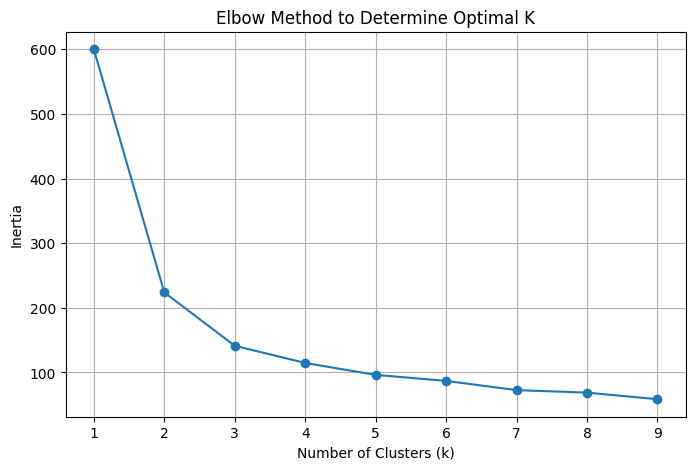

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

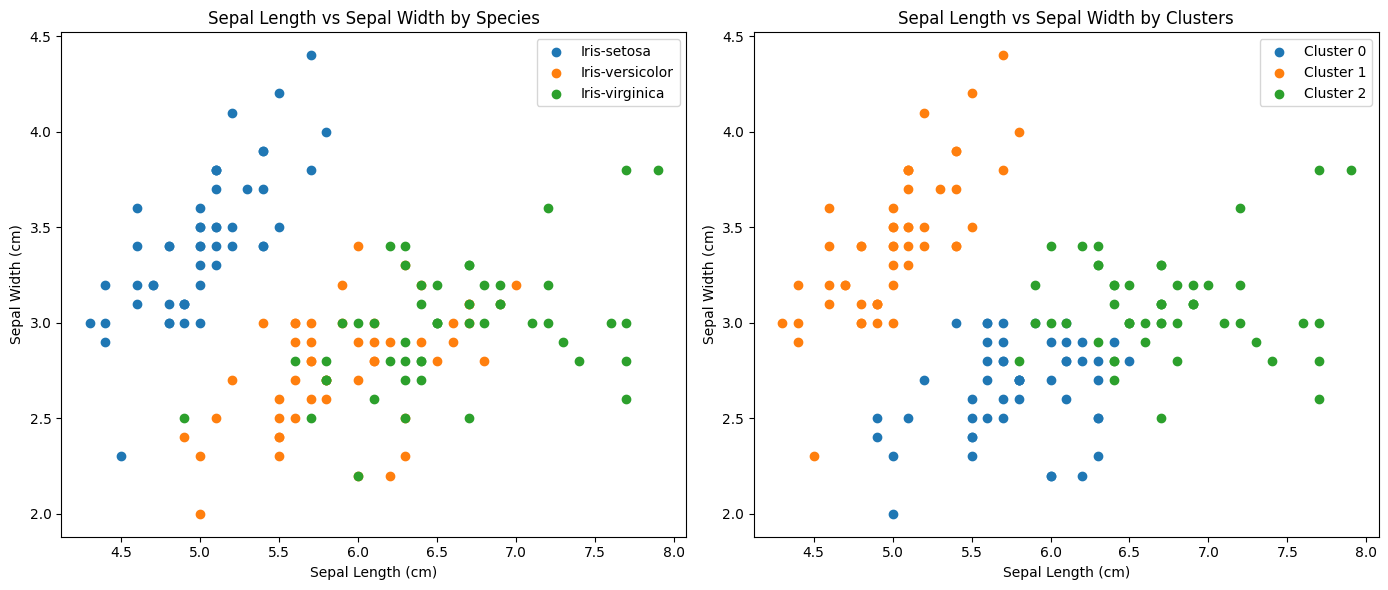

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for species in data['Species'].unique():
    subset = data[data['Species'] == species]
    axes[0].scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=species)
axes[0].set_title('Sepal Length vs Sepal Width by Species')
axes[0].set_xlabel('Sepal Length (cm)')
axes[0].set_ylabel('Sepal Width (cm)')
axes[0].legend()

for cluster in sorted(data['cluster'].unique()):
    subset = data[data['cluster'] == cluster]
    axes[1].scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=f'Cluster {cluster}')
axes[1].set_title('Sepal Length vs Sepal Width by Clusters')
axes[1].set_xlabel('Sepal Length (cm)')
axes[1].set_ylabel('Sepal Width (cm)')
axes[1].legend()

plt.tight_layout()
plt.show()